# Part I - Ford GoBike System Data Exploration
## by Oluwatobi Akinboboye

## Introduction

>The Ford GoBike System, often known as Bay Wheels, is a public bike sharing program in the San Francisco Bay Area of California. With approximately 200,000 rides since its debut in 2017, Bay Wheels is the first regional and extensive bicycle sharing system set up in California and along the West Coast of the United States. As of January 2018, it has about 10,000 annual subscribers.

>This data set contains over 180,000 records/information on individual rides taken in the bike-sharing system in February 2019, as well as their monthly individual trip data. With the help of exploratory and explanatory data analysis and visualizations, I intend to obtain a broad overview of the dataset and provide responses to questions about bike excursions.



In [1]:
#!pip install seaborn==0.11.2

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("dark")

%matplotlib inline

### Loading and Assessing Data

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [8]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [10]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [11]:
df.shape

(183412, 16)

### What is the structure of your dataset?

> This data set contains details on each ride taken in a bike-sharing program that services the greater San Francisco Bay area. The dataset with 16 columns contains more than 180,000 bike-riding data points. The majority of variables use numeric data types. This data collection will be divided into three main categories: 
   * trip duration: duration_sec, start_time, end_time
   * station info: start_station_id, start_station_name, start_station_latitude, start_station_longitude,       end_station_id, end_station_name, end_station_latitude, end_station_longitude
   * user info (anonymized): bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip


### What is/are the main feature(s) of interest in your dataset?

> The duration and rental event occurrence patterns, as well as how these relate to the riders' characteristics, such as their user type, gender, and age, are the major aspects I want to investigate in the bike rides in order to gain a perspective of how and what people are using the bike sharing service for.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I'll be able to determine how long a journey typically lasts and on what day(s) of the week by knowing the start date, time, and duration for each trip. The member data, such as user type, gender, and age, will help me identify who the major target consumer groups are. I can then apply the different groups to summarize data on bike usage to check for any distinctive patterns related to particular riding communities.

### Quality issues

* missing values are found in gender, birth date, start & end stations columns
* start, end time columns need to be modified into datetime data type.
* gender Column contains unneeded values 'Other'

### Tidiness issues

* new column for day of week, day of month & hour should be created
* new column should be created showing Age from 'Birth year' column
* some rows have no values 
* some columns won't be needed in this analysis and should be dropped

## Cleaning Data

### Issue 1: Remove missing values 

In [12]:
#drop null rows with null values
df = df.dropna()

#check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

### Issue 2: Change datatypes

In [13]:
# change datatypes  
df[['start_time', 'end_time']] = df[['start_time', 'end_time']].apply(pd.to_datetime)
df[['start_station_id', 'end_station_id', 'member_birth_year']] = df[['start_station_id', 'end_station_id', 'member_birth_year']].apply(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### Issue 3: Drop odd values in gender column

In [14]:
df = df[df['member_gender'].str.contains('Other') == False].reset_index()

#check
df['member_gender'].value_counts()

Male      130500
Female     40805
Name: member_gender, dtype: int64

### Issue 4: Create new 'Age' column

In [15]:
df['age'] = 2019 - df['member_birth_year']

#check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171305 entries, 0 to 171304
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   index                    171305 non-null  int64         
 1   duration_sec             171305 non-null  int64         
 2   start_time               171305 non-null  datetime64[ns]
 3   end_time                 171305 non-null  datetime64[ns]
 4   start_station_id         171305 non-null  int64         
 5   start_station_name       171305 non-null  object        
 6   start_station_latitude   171305 non-null  float64       
 7   start_station_longitude  171305 non-null  float64       
 8   end_station_id           171305 non-null  int64         
 9   end_station_name         171305 non-null  object        
 10  end_station_latitude     171305 non-null  float64       
 11  end_station_longitude    171305 non-null  float64       
 12  bike_id         

### Issue 5: Create new column for day of week, day of month, minute & hour 

In [16]:
#create a column for minute
df['duration_minute'] = df['duration_sec']/60

#create a column for day of week, day of month & hour
df['start_day'] = df['start_time'].dt.day
df['start_day_of_week'] = df['start_time'].dt.day_name()
df['start_hour'] = df['start_time'].dt.hour
df['end_day'] = df['end_time'].dt.day
df['end_day_of_week'] = df['end_time'].dt.day_name()
df['end_hour'] = df['end_time'].dt.hour

#check
df.head()

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,member_gender,bike_share_for_all_trip,age,duration_minute,start_day,start_day_of_week,start_hour,end_day,end_day_of_week,end_hour
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,...,Male,No,35,869.750000,28,Thursday,17,1,Friday,8
1,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),...,Male,No,47,1030.900000,28,Thursday,12,1,Friday,5
2,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,...,Male,Yes,45,26.416667,28,Thursday,23,1,Friday,0
3,5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,...,Male,No,60,29.883333,28,Thursday,23,1,Friday,0
4,6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,...,Female,No,36,19.116667,28,Thursday,23,1,Friday,0


### Issue 6: Drop columns that won't be needed in analysis

In [17]:
drop_cols = ['index','start_time', 'end_time', 'start_station_id', 'start_station_name','end_station_name','start_station_latitude', 'start_station_longitude',
                    'end_station_id', 'end_station_latitude', 'end_station_longitude']
df = df.drop(columns=drop_cols,axis=1)


#check 
df.head()

,duration_sec,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_minute,start_day,start_day_of_week,start_hour,end_day,end_day_of_week,end_hour
0,52185,4902,Customer,1984,Male,No,35,869.750000,28,Thursday,17,1,Friday,8
1,61854,5905,Customer,1972,Male,No,47,1030.900000,28,Thursday,12,1,Friday,5
2,1585,4898,Subscriber,1974,Male,Yes,45,26.416667,28,Thursday,23,1,Friday,0
3,1793,5200,Subscriber,1959,Male,No,60,29.883333,28,Thursday,23,1,Friday,0
4,1147,3803,Subscriber,1983,Female,No,36,19.116667,28,Thursday,23,1,Friday,0


In [18]:
df.shape

(171305, 14)

# Exploratory Data Analysis & Visualizations

## Univariate Exploration 

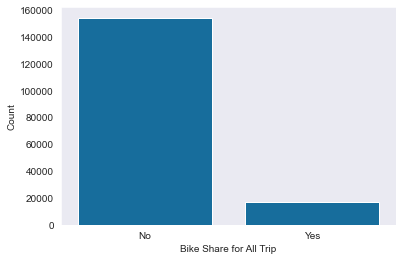

In [19]:
base_color = sb.color_palette('colorblind')[0]

sb.countplot(data=df, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

This plot demonstrates that the majority of members were subscribers as opposed to casual riders, and the majority of members did not utilize bike sharing for all of their journeys.

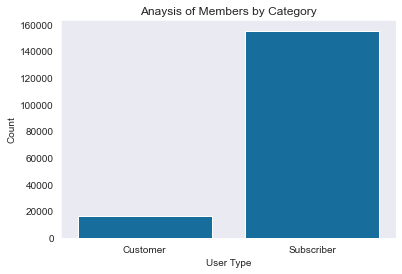

In [20]:
sb.countplot(data=df, x='user_type', color=base_color)
plt.title('Anaysis of Members by Category')
plt.xlabel('User Type');
plt.ylabel('Count');

This graph illustrates how the two groups that utilize the bike system are primarily distributed, demonstrating that more than 140,000 bike riders are subscribers as opposed to less than 20,000 consumers.

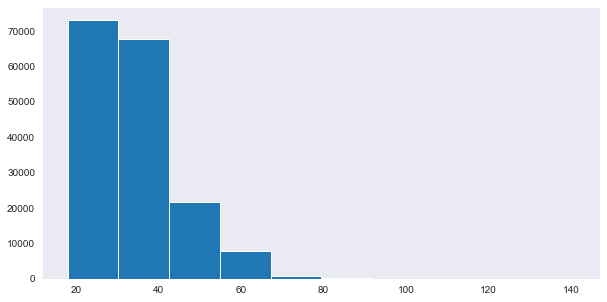

In [21]:
plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'age')

plt.show()

This figure has a right skew, which explains why the majority of bike riders are between the ages of 20 and 70.

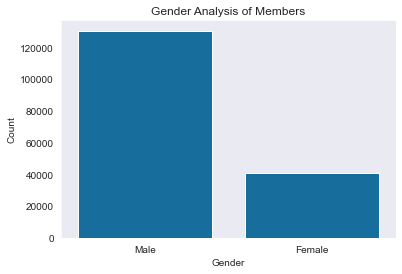

In [22]:
sb.countplot(data=df, x='member_gender', color=base_color);
plt.title('Gender Analysis of Members')
plt.xlabel('Gender');
plt.ylabel('Count');

The majority of riders on the bike system are men (with a higher percentage being subscribers), compared to the approximately 40,000 female riders on the back.

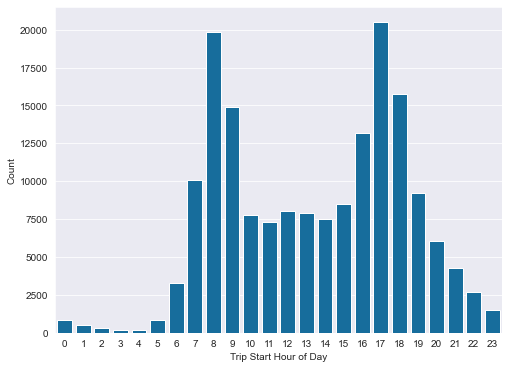

In [23]:
# A plot to explore the trips distribution over hour-of-day

plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=df, x='start_hour', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

The figure depicts the distribution of trips throughout the hours of the day, revealing that the majority of trips occur around 8 a.m. (undoubtedly when most people head to work or morning exercises/cycling) and in the evening hour of 17 p.m., when many people return home from work.

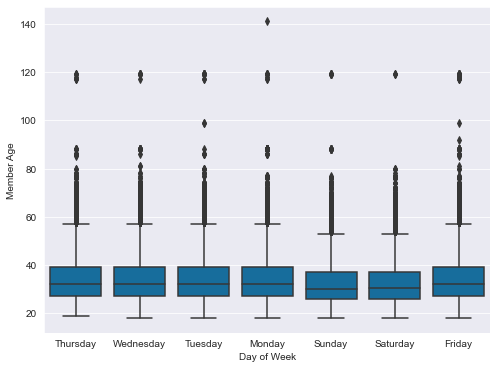

In [24]:
# Member age by weekdays

sb.boxplot(data=df, x='start_day_of_week', y='age', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Member Age');

This visualization does not truly convey a specific message because the points on the plot are distributed over the x-axis from 0 to over 1400 seconds.

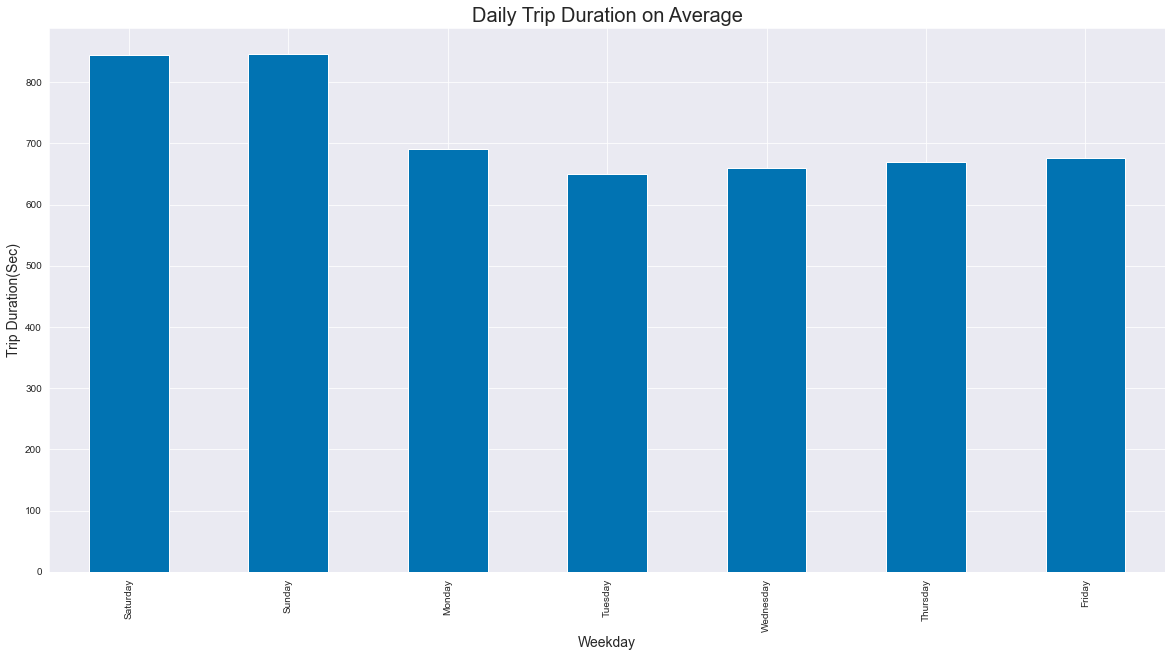

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
df_dr = df.groupby('start_day_of_week')['duration_sec'].mean()[['Saturday', 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']]
ax = df_dr.plot(kind='bar', color = base_color)
plt.title('Daily Trip Duration on Average', fontsize=20)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Trip Duration(Sec)', fontsize=14);

Average trip duration has a clear advantage on Saturdays and Sundays, when both subscribers and consumers have more time to ride, exercise, and cycle rather than riding solely to work and back.

In [26]:
def age_range(age):
    if 10<age<=20:
        return '11-20'
    
    elif 20<age<=30:
        return '21-30'  
    
    elif 30<age<=40:
        return '31-40'
    
    elif 40<age<=50:
        return '41-50'
    
    elif 50<age<=60:
        return '51-60'

df['age_range'] = df['age'].apply(age_range)

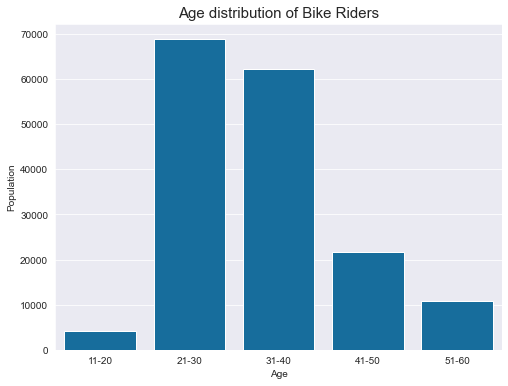

In [27]:
age_order = ['11-20', '21-30', '31-40', '41-50', '51-60']
sb.countplot(data=df, x='age_range', color=base_color, order=age_order)

ax = plt.gca()
ax.set_ylabel('Population')
ax.set_xlabel('Age')
ax.set_title("Age distribution of Bike Riders", fontsize=15);

A combines total of about 129,000 of all bike users are between the ages of 21 and 40, making up the largest age group.

## Bivariate Exploration

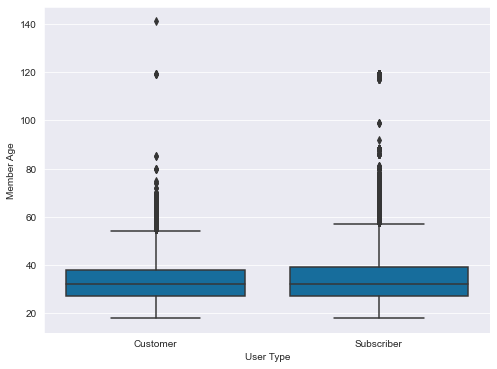

In [28]:
# Member age between customers and subscribers

sb.boxplot(data=df, x='user_type', y='age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Member Age');

The subscribers who ride the most frequently on Monday through Friday are a little older than consumers, with a greater variety of ages as well, similar to the member age by weekdays plot.

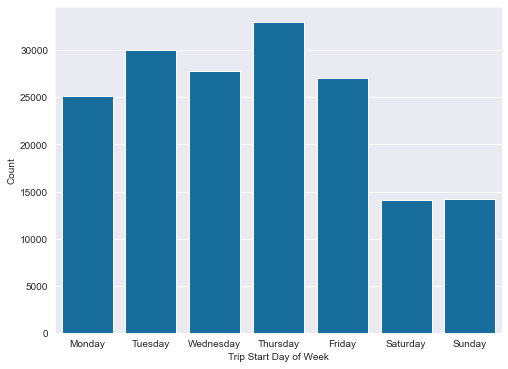

In [29]:
# A plot to explore the trips distribution over day-of-week.
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday = pd.api.types.CategoricalDtype(ordered=True, categories=day)
df['start_day_of_week'] = df['start_day_of_week'].astype(weekday)

plt.rcParams['figure.figsize'] = 8, 6
sb.countplot(data=df, x='start_day_of_week', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

Riders who leased the bikes Monday through Friday are slightly older than those who ride on weekends, which correlates to the commuting to work usage seen in the univariable exploration plots.

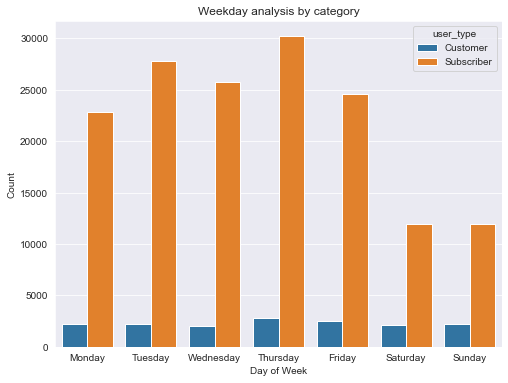

In [30]:
# Weekly usage between customers and subscirbers

sb.countplot(data=df, x='start_day_of_week', hue='user_type');
plt.title('Weekday analysis by category')
plt.xlabel('Day of Week');
plt.ylabel('Count');

Overall, subscriber use was substantially higher than casual consumer usage. The drop in subscribers' use on weekends indicates that they primarily ride bikes for work commutes during the week, whereas the almost opposite pattern of a slight increase in use for customers on weekends demonstrates that the use was more for leisure/touring/exercising and relaxing purposes.

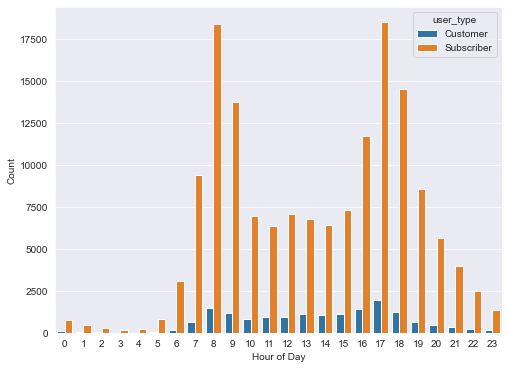

In [31]:
# Daily usage between customers and subscribers

sb.countplot(data=df, x='start_hour', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

Subscriber usage obviously rises during normal rush hours when individuals are leaving for work in the morning and returning home in the afternoon, confirming their usage purpose and objective of riding. Customers who ride in the afternoon or early evening for a different reason than subscriber riders did not show a similar trend.

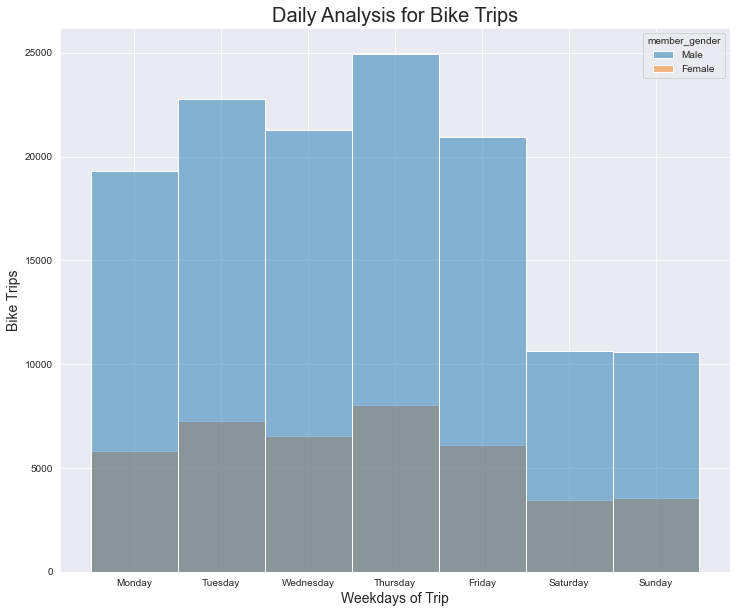

In [32]:
fig, ax = plt.subplots(figsize=(12,10))
ax = sb.histplot(data=df, x=df['start_day_of_week'], hue='member_gender')
plt.title('Daily Analysis for Bike Trips', fontsize=20)
plt.ylabel('Bike Trips', fontsize=14)
plt.xlabel('Weekdays of Trip', fontsize=14); 

The very excessive demand of the bike system by subscribers and consumers on Thursdays, maybe due to one reason or the other but could be as a result of the closeness to the weekend, explains why there are higher trip prices on that day.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>Subscribers outnumber customers by a large margin. Subscribers' and customers' riding habits/patterns differ widely. Customers like to ride for enjoyment on weekends in the afternoons or early nights, whereas subscribers utilize the bike sharing system for work communication, hence the majority of journeys occurred on work days, particularly during morning rush hour (when going to work in the morning and getting off work in the afternoon). 

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> According to the plots, the bulk of subscribers are from San Francisco's working class, based on the increase in bike utilization between the early and late hours compared to consumers. Subscribers also take far shorter/quicker rides.

## Multivariate Exploration

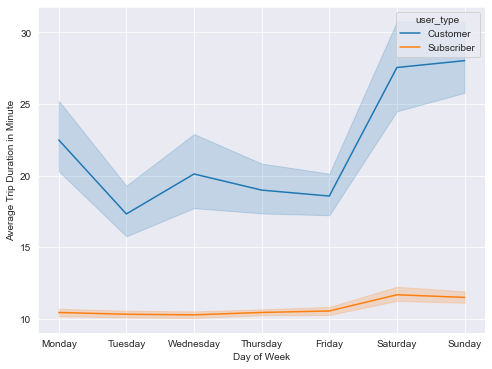

In [33]:
# How does the average trip duration vary in weekdays between customers and subscribers?

sb.lineplot(data=df, x='start_day_of_week', y='duration_minute', hue='user_type');
#, dodge=0.4, linestyles=""
plt.xlabel('Day of Week');
plt.ylabel('Average Trip Duration in Minute');

The accompanying plot shows that subscribers ride substantially shorter/quicker journeys than consumers on each day of the week. On Saturdays and Sundays, both user classes show a clear rise in journey time during weekends, particularly for casual riders. Subscribers appear to be more efficient than consumers generally, with a highly steady average length from Monday to Friday.

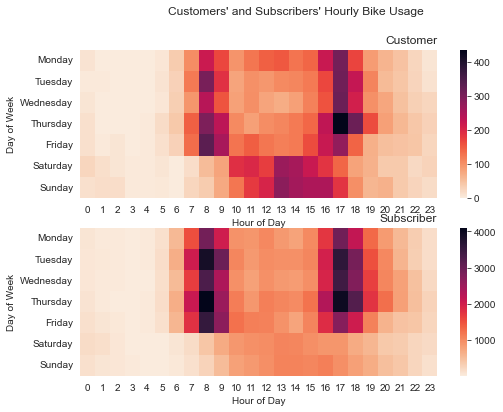

In [34]:
# How does the hourly usage during the weekdays for customers and subscribers?

plt.suptitle("Customers' and Subscribers' Hourly Bike Usage")

plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
customer_count = customers.groupby(['start_day_of_week', 'start_hour']).size()
customer_count = customer_count.reset_index(name='count')
customer_count = customer_count.pivot(index='start_day_of_week', columns='start_hour', values='count')
sb.heatmap(customer_count, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


plt.subplot(2, 1, 2)
subscribers = df.query('user_type == "Subscriber"')
subscriber_count = subscribers.groupby(['start_day_of_week', 'start_hour']).size()
subscriber_count = subscriber_count.reset_index(name='count')
subscriber_count = subscriber_count.pivot(index='start_day_of_week', columns='start_hour', values='count')
sb.heatmap(subscriber_count, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

The heat map precisely shows the various patterns of consumers and subscribers utilizing these bikes. Both customers and subscribers see significant usage during the weekdays between the hours of 7 - 9 a.m. and 16-19 p.m., as well as fair usage on weekends between the hours of 10-18 p.m.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Univariate exploration examines and explains data-driven patterns in its simplest form. Bivariate investigation broadens our understanding of trends, while multivariate exploration improves our representation of customer and subscriber data.
The more heated trend in the subscriber sector explains that these bikes are used more frequently by subscribers than consumers throughout the weekdays.

#### Were there any interesting or surprising interactions between features?

> This analysis reveals no surprise interactions between traits, considering each one of our conclusions was supported by a plausible sentence.

## Conclusions

>Finally, this analysis provides a wide summary of the information as well as answers to questions concerning bike trips in San Francisco. Our analysis suggests that the dataset is made up of two key components: subscribers and consumers. It also explains and illustrates the usage of each of these groups of users, indicating that there are considerably more subscribers than consumers.

>Because these bikes are widely utilized during the week, particularly on Thursdays between 7 - 9 a.m. and 16-19 p.m., and on weekends between 10-18 p.m. We've seen that members take far shorter/quicker journeys, which is noteworthy given that more than 70% of bike riders are between the ages of 21 and 40. Based on the rise in bike use between the early and late hours compared to customers and the age range, we may conclude that the bulk of subscribers are from San Francisco's working class.
